# Distance and Nearest Neighbor Calculations
### by [Kate Vavra-Musser](https://vavramusser.github.io) for the [R Spatial Notebook Series](https://vavramusser.github.io/r-spatial)

## Introduction

Proximity analysis is a critical aspect of spatial analysis, enabling researchers to evaluate distances between spatial features, assess accessibility, and identify relationships between locations.  Proximity analysis is widely used in accessibility studies, urban planning, environmental research, and many other fields.

For this notebook, we’ll use the [*rnaturalearth*](https://cran.r-project.org/web/packages/rnaturalearth/index.html) package to access and load datasets from [*Natural Earth*](https://www.naturalearthdata.com). These packages provide direct access to Natural Earth’s geographic data without requiring an API key, making it simple to bring boundaries and point data directly into R.

This notebook introduces three commonly used geometric query functions from the [**`sf`**](https://cran.r-project.org/web/packages/sf/index.html) package:

* *`st_distance`*
* *`st_nearest_feature`*

### Notebook Goals
This notebook demonstrates how to perform proximity analysis using R, covering common scenarios and applications.

### ✨ Prerequisites ✨
* Complete [Introduction to sf: Reading, Writing, and Inspecting Vector Data](https://platform.i-guide.io/notebooks/9968babe-22e4-4c3d-98e2-d8b45e9672cd)
* Complete [Working with CRS: Reprojection and Transformation](https://platform.i-guide.io/notebooks/76912ca7-73e4-437e-8ecf-0cb456bd7282)
* Complete [Preparing Vector Data for Analysis](https://platform.i-guide.io/notebooks/44926d85-7f08-4774-a103-a22ff3876cad)
* Complete [IPUMS NHGIS Data Extraction Using ipumsr: Supplemental Exercise 1](https://platform.i-guide.io/notebooks/a74fff96-4db5-430f-b346-958b0c5f7b38)
* Complete [Importing Data from Natural Earth with rnaturalearth and rnaturalearthdata](https://platform.i-guide.io/notebooks/934e764c-d727-4bab-bc1c-198233484adc)

### 💽 Data Used in this Notebook 💽
* United States Populated Places Point Locations Shapefile (*ipums_nhgis_places.shp*)
  * If you worked through [IPUMS NHGIS Data Extraction Using ipumsr: Supplemental Exercise 1](https://platform.i-guide.io/notebooks/a74fff96-4db5-430f-b346-958b0c5f7b38) you should have created and saved a copy of *ipums_nhgis_places.shp* in the final section of the notebook.
  * You can also download a copy of *ipums_nhgis_places.zip* file from [the I-GUIDE platform](https://platform.i-guide.io/datasets/514a645c-fb7e-405e-99de-ac12cf1b143b) or directly from [Kate's GitHub](https://github.com/vavramusser/r-spatial/blob/main/ipums_nhgis_places.zip).  You will need to unzip *ipums_nhgis_places.zip* and extract *ipums_nhgis_places.shp* file to your workspace.
* United States Boundary Shapefile (*usa_boundary.shp*)
  * If you worked through [Importing Data from Natural Earth with rnaturalearth and rnaturalearthdata](https://platform.i-guide.io/notebooks/934e764c-d727-4bab-bc1c-198233484adc) you should have created and saved a copy of *usa_boundary.shp* in the final section of the notebook.
  * You can also download a copy of *usa_boundary.zip* file from [the I-GUIDE platform](https://platform.i-guide.io/datasets/aae279db-71f0-47e4-91e7-e8ac8791ea56) or directly from [Kate's GitHub](https://github.com/vavramusser/r-spatial/blob/main/usa_boundary.zip).  You will need to unzip *usa_boundary.zip* and extract *usa_boundary.shp* file to your workspace.
* Global Airport Point Locations Shapefile (*airports.shp*)
  * If you worked through [Importing Data from Natural Earth with rnaturalearth and rnaturalearthdata](https://platform.i-guide.io/notebooks/934e764c-d727-4bab-bc1c-198233484adc) you should have created and saved a copy of *airports.shp* in the final section of the notebook.
  * You can also download a copy of *airports.zip* file from [the I-GUIDE platform](https://platform.i-guide.io/datasets/dddd4ed7-1326-44ea-a10e-f8b7d684efeb) or directly from [Kate's GitHub](https://github.com/vavramusser/r-spatial/blob/main/airports.zip).  You will need to unzip *airports.zip* and extract *airports.shp* file to your workspace.

#### Notebook Overview
1. Setup
2. Distance
3. Nearest Feature
4. Distance Matrix

---

## 1. Setup
This section will guide you through the process of installing essential packages and setting your IPUMS API key.

##### Required Packages

[**sf**](https://cran.r-project.org/web/packages/sf/index.html) · Support for simple features, a standardized way to encode spatial vector data. Binds to 'GDAL' for reading and writing data, to 'GEOS' for geometrical operations, and to 'PROJ' for projection conversions and datum transformations. Uses by default the 's2' package for spherical geometry operations on ellipsoidal (long/lat) coordinates.  This notebook uses the following functions from *sf*.

* [*geos_measures*](https://rdrr.io/cran/sf/man/geos_measures.html) · compute geometric measurements
  * *st_distance* · compute distance
* [*st_crs*](https://rdrr.io/cran/sf/man/st_crs.html) · retrieve coordinate reference system from object
* [*st_nearest_feature*](https://rdrr.io/cran/sf/man/st_nearest_feature.html) · get index of nearest featur
* [*st_read*](https://rdrr.io/cran/sf/man/st_read.html) · read simple features or layers from file or database
* [*st_transform*](https://rdrr.io/cran/sf/man/st_transform.html) · transform or convert coordinates of simple feature
* [*valid*](https://rdrr.io/cran/sf/man/valid.html) · check validity or make an invalid geometry valid
  * *st_is_valid* · check validity

### 1a. Install and Load Required Packages
If you have not already installed the required packages, uncomment and run the code below:

In [3]:
# install.packages("sf")

Load the packages into your workspace.

In [2]:
library(sf)

Linking to GEOS 3.11.2, GDAL 3.8.2, PROJ 9.3.1; sf_use_s2() is TRUE



### 1b. Import Data

First we will import three vector datasets to work with using the [*st_read*](https://rdrr.io/cran/sf/man/st_read.html) function from the [**sf**](https://cran.r-project.org/web/packages/sf/index.html) package.  If you worked through [Chapter 3.4.1](), [Chapter 3.4.2](), and [Chapter 4.1](), you should have saved these files to your workspace and they should be available to work with directly.  If you did not work through these chapters, you can download and import the files to your workspace.

* **United States Populated Places Point Locations** (*ipums_nhgis_places.shp*) downloaded from [IPUMS NHGIS](https://www.nhgis.org) in [Chapter 3.4.1 IPUMS NHGIS Data Extraction Using ipumsr - Supplemental Exercise 1](). 
* **Global Airport Point Locations** (*airports.shp*) downloaded from [Natural Earth](https://www.naturalearthdata.com) in [Chapter 4.1 Importing Data from Natural Earth with rnaturalearth and rnaturalearthdata](). 

In [172]:
# Read sample data: Census tracts and public service locations
places <- st_read("ipums_nhgis_places.shp")
airports <- st_read("airports.shp")
usa <- st_read("usa_boundary.shp")

Reading layer `ipums_nhgis_places' from data source 
  `C:\Users\vavra\Dropbox\R Spatial\r-spatial\ipums_nhgis_places.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 29261 features and 8 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -6238595 ymin: -1328241 xmax: 2254129 ymax: 4577031
Projected CRS: USA_Contiguous_Albers_Equal_Area_Conic
Reading layer `airports' from data source 
  `C:\Users\vavra\Dropbox\R Spatial\r-spatial\airports.shp' using driver `ESRI Shapefile'
Simple feature collection with 893 features and 39 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -175.1356 ymin: -53.78147 xmax: 179.1954 ymax: 78.24672
Geodetic CRS:  WGS 84
Reading layer `usa_boundary' from data source 
  `C:\Users\vavra\Dropbox\R Spatial\r-spatial\usa_boundary.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 166 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -171.7911 ymin: 18.9161

We can see that the *places* file contains point locations and information on 29,261 populated places in the US, the *usa* file contains one boundary for the United States, and the *airports* file contains point locations and information on 893 major airports globally.

### 1c. Project All Files to the Same CRS

Let's ensure that all three files are using the same coordinate reference system (CRS).  Based on the file information output from reading in the data in the above code chunk, we can see that the *places* file from [IPUMS NHGIS](https://www.nhgis.org) uses the [USA Contiguous Albers Equal Area Conic projected CRS](https://epsg.io/102003) while the *airports* file from [Natural Earth](https://www.naturalearthdata.com) uses the [WGS 1984 Geodetic CRS](https://epsg.io/4326).

For this notebook, we will use the [USA Contiguous Albers Equal Area Conic projected CRS](https://epsg.io/102003) used by *places* so we will need to reproject the *airports* file to this CRS.

In [173]:
airports <- st_transform(airports, st_crs(places))
usa <- st_transform(usa, st_crs(places))

Let's check to make sure the *places* and *ariports* CRS are the same.

In [111]:
st_crs(places) == st_crs(airports)

[1] TRUE

Both files are now represented in the [USA Contiguous Albers Equal Area Conic projected CRS](https://epsg.io/102003).

### 1d. Validate the Data

Let's ensure that both files we are working with have valid geometries using the [*st_is_valid*](https://rdrr.io/cran/sf/man/valid.html) function from the [**sf**](https://cran.r-project.org/web/packages/sf/index.html) package.  If there are any invalid geometries that could impact our ability to carry out spatial analyses or properly map our data.

In [112]:
table(st_is_valid(places))


 TRUE 
29261 

In [113]:
table(st_is_valid(airports))


TRUE 
 893 

All 29,261 features in the *places* file and all 893 features in the *airports* file are all valid!  We are ready to move on to the next step.

### 1e. Review the Data

Let's take a look at the first few rows for the *places* and *airports* files as a refresher to see what attibutes (columns) each file includes.

In [114]:
head(places)

,GISJOIN,PLACE,STATE,CL8AA1990,CL8AA2000,CL8AA2010,CL8AA2020,NAME,geometry
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<POINT [m]>
1,G01000100,Abanda CDP,Alabama,177.25,131.68,192,133.00,Abanda,POINT (969164.2 -438781.6)
2,G01000124,Abbeville city,Alabama,3176.41,2987.18,2688,2358.00,Abbeville,POINT (1014139 -605274.1)
3,G01000460,Adamsville city,Alabama,5620.12,5107.32,4522,4353.93,Adamsville,POINT (832255.1 -396765.6)
4,G01000484,Addison town,Alabama,715.01,743.68,758,659.00,Addison,POINT (805355.9 -331802.2)
5,G01000676,Akron town,Alabama,444.66,448.09,356,225.00,Akron,POINT (767096.4 -483924.3)
6,G01000820,Alabaster city,Alabama,15885.55,24415.70,30352,32519.23,Alabaster,POINT (848916.6 -435175.1)


In [115]:
head(airports)

scalerank featurecla type             name           abbrev location gps_code
1 9         Airport    small            Sahnewal       LUH    terminal VILD    
2 9         Airport    mid              Solapur        SSE    terminal VASL    
3 9         Airport    mid              Birsa Munda    IXR    terminal VERC    
4 9         Airport    mid              Ahwaz          AWZ    terminal OIAW    
5 9         Airport    mid and military Gwalior        GWL    terminal VIGR    
6 9         Airport    mid              Hodeidah Int'l HOD    terminal OYHD    
  iata_code wikipedia                                                 
1 LUH       http://en.wikipedia.org/wiki/Sahnewal_Airport             
2 SSE       http://en.wikipedia.org/wiki/Solapur_Airport              
3 IXR       http://en.wikipedia.org/wiki/Birsa_Munda_Airport          
4 AWZ       http://en.wikipedia.org/wiki/Ahwaz_Airport                
5 GWL       http://en.wikipedia.org/wiki/Gwalior_Airport              
6 HOD       http://en.wikipedia.org/wiki/Hodeida_International_Airport
  natlscale geometry                  ⋯ name_tr              
1 8         POINT (8808195 10465025)  ⋯ NA                   
2 8         POINT (10209554 10803218) ⋯ NA                   
3 8         POINT (-9424717 11334402) ⋯ Birsa Munda Havaalan?
4 8         POINT (9000058 7892749)   ⋯ Ahvaz Havaliman?     
5 8         POINT (9242202 10804824)  ⋯ NA                   
6 8         POINT (10745990 7152117)  ⋯ NA                   
  name_vi             name_zh  wdid_score name_fa                  name_he
1 NA                  NA       4          ??????? ?????            NA     
2 NA                  NA       4          ??????? ???????          NA     
3 Sân bay Birsa Munda ???·???? 4          ??????? ????? ?????      NA     
4 Sân bay Ahvaz       ?????    4          ??????? ??? ?????? ????? NA     
5 Sân bay Gwalior     ??????   4          ??????? ???????          NA     
6 NA                  ???????  4          ??????? ????????? ?????? NA     
  name_uk name_ur name_zht geometry                 
1 NA      NA      NA       POINT (8808195 10465025) 
2 NA      NA      NA       POINT (10209554 10803218)
3 NA      NA      ???·???? POINT (-9424717 11334402)
4 NA      NA      ?????    POINT (9000058 7892749)  
5 NA      NA      ??????   POINT (9242202 10804824) 
6 NA      NA      ???????  POINT (10745990 7152117)

Let's take a look at the different categories of the *type* and *location* variables in the *airports* file.

In [86]:
unique(airports$type)

[1] "small"              "mid"                "mid and military"  
[4] "major and military" "military mid"       "military"          
[7] "major"              "military major"     "spaceport"

In [87]:
unique(airports$location)

[1] "terminal"    "ramp"        "runway"      "approximate" "parking"    
[6] "freight"

Based on this preliminary reivew of the data, here are a few attributes we may want to take note of for our analyses are:

From the ***places*** file:

* City Name (*PLACE*)
* State Name (*STATE*)
* 1990 Total Population (*CL8AA1990*)
* 2000 Total Population (*CL8AA2000*)
* 2010 Total Population (*CL8AA2010*)
* 2020 Total Population (*CL8AA2020*)

From the ***airports*** file:

* Airport Name (*name*)
* Airport Code (*abbrev*)
* Airport Type (*type*)
  * categories: small, mid, major, military, military mid, military major, mid and military, major and military, spaceport
* Airport Location (*location*)
  * categories: terminal, ramp, runway, approximate, parking, freight

Finally, let's take a quick look at the plots of the geometry for these two files.

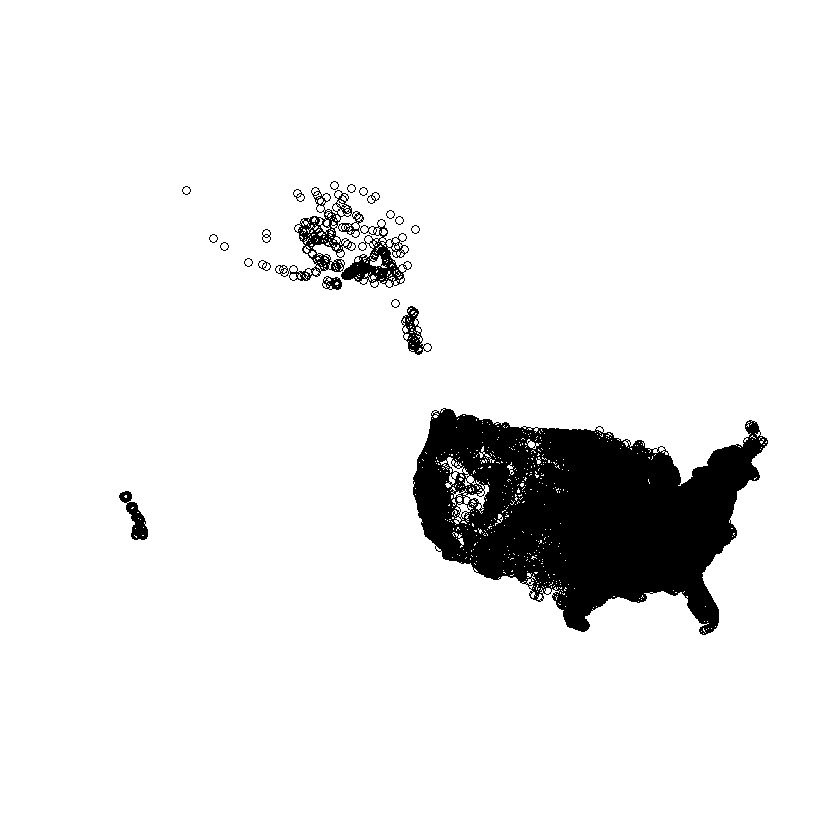

In [25]:
plot(st_geometry(places))

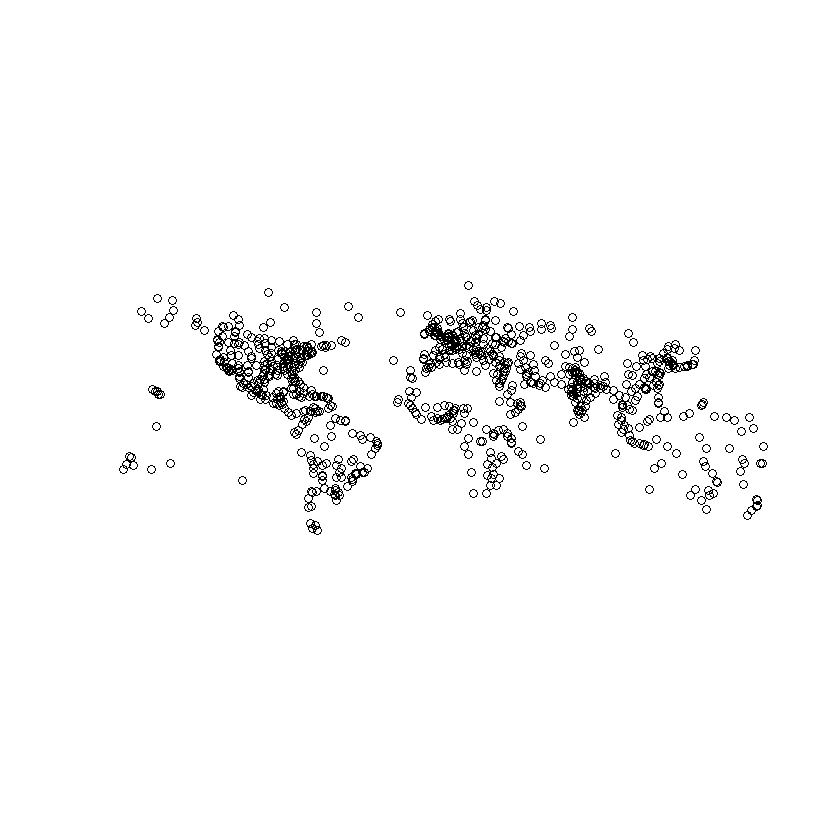

In [26]:
plot(st_geometry(airports))

The plots show the point locations for populated places in the United States (*places*) and global major airports (*airports*).

## 2. Distance

This section will explore some basic methods for calculating distance.  For these exercises, we will use a single populated place (New York City) and a single airport (John F. Kennedy Airport) and explore calculating the distance between these two points using each of the calculation methods.

The two major types of distance calculations you will likely encounter in your analyses are Euclidean and Great Circle distance calculations.  Euclidean distance calculates the **straight-line distance** between two points on a **flat plane**, while Great Circle distance calculates the **shortest distance** between two points on a **sphere**, like the Earth.  Great Circle calculations follow the curve of the sphere along a "great circle" path, making it the more accurate measure for distances on a globe when dealing with long distances between geographic locations.  Essentially, Euclidean distance is "as the crow flies" on a flat surface, while great circle distance is "as the crow flies" on a curved surface like the Earth. 

In [47]:
# New York City
nyc <- places[places$PLACE == "New York city",]

# John F Kennedy Airport
jfk <- airports[581,]

### 2a. Euclidean Distance (Planar)

Euclidean distance is the "straight-line" distance between two points in Cartesian space. It is calculated based on projected coordinates and is often used for smaller areas.  Euclidean distance calculations are best for small-scale, local projections where curvature is negligible.  They are used for calculating straight-line distances in projected coordinate systems.

Euclidian distance is calculated using projected CRS.  Since we have already projected the *places* and *airports* files to the [USA Contiguous Albers Equal Area Conic projected CRS](https://epsg.io/102003) we are good to go.

In [50]:
dist_euclidean <- st_distance(nyc, jfk)
print(dist_euclidean)

Units: [m]
         [,1]
[1,] 19937.31


The calculated distance between the point locations representing New York City and the JFK Airport is about 19,937 meters (about 12.4 miles).

### 2b. Great Circle Distance (Haversine)

Geodesic distance is the shortest path between two points on the Earth's surface. It is more accurate for larger areas or when working with lat/lon coordinates.  Great Circle distance calculations are appropriate for geographic (longitude/latitude) coordinates.  This type of calculation accounts for Earth's curvature using the Haversine formula.

Great Circle distance is calculated using geodesic CRS.  Before calculating the Great Circle distance between our two points, let's first transform them to the [WGS 1984 Geodetic CRS](https://epsg.io/4326).

In [54]:
nyc_wgs <- st_transform(nyc, 4326)
jfk_wgs <- st_transform(jfk, 4326)

In [55]:
dist_greatcircle <- st_distance(nyc_wgs, jfk_wgs)
print(dist_greatcircle)

Units: [m]
         [,1]
[1,] 20018.84


The calculated distance between the point locations representing New York City and the JFK Airport is about 20,019 meters (about 12.4 miles).  The result is slight different from what we got when usign Euclidean distance with projected versions of our data.  The difference is only about 82 meters which may seem insignificant but the important thing to remember is that calculating distance using Euclidean Distance with projected data can yield different results than when using Great Circle distance with unprojected data.

### 2c. Advanced Distance Calculations

This section outlines a few types of less-common distance calculations.  If you are carrying out typical spatial analyses for the social sciences, it is unlikely that you will need any of these specialzied distance calculations.  However, it is useful to be aware of them.

#### Manhattan Distance (Taxicab)

The Manhattan distance is the sum of the absolute differences between the coordinates of two points.  It is named "Taxicab Distance" because it represents the shortest path when moving along a grid-based system (like a city with streets and avenues).  It does not account for diagonal movement—only horizontal and vertical moves.

For example, imagine walking in New York City where streets form a grid.  If you want to go from one intersection to another, you must travel along the streets (you cannot cut through buildings!).  The Manhattan distance counts the total number of blocks you must walk.

In spatial analyses, Manhattan Distance is used in urban planning or city time travel estimates where movement is restricted to grids.

In [63]:
dist_manhattan <- sum(abs(st_coordinates(nyc) - st_coordinates(jfk)))
print(dist_manhattan)

[1] 22879.68


Using the Manhattan distance calculation method, the distance between the New York City and JFK airport point locations is 22,880 meters (about 14.2 miles), 2942 and 2861 meters (about 1.8 miles) greater than the Euclidian and Great Circle distance results, respectively.

#### Minkowski Distance (Generalized Distance)

The Minkowski distance is a generalization of both Euclidean and Manhattan distances.  It introduces a tunable parameter *p* which allows the user to control the level of "curvature" in the distance calculation.

* *p* = 1 → Manhattan Distance
* *p* = 2 → Euclidean Distance
* *p* = 3 → compromise between Euclidean and Manhattan (more weight to larger coordinate differences)
* *p* = ∞ → Chebyshev Distance

In spatial analyses, Minkowski Distance is used in machine learning (KNN algorithm) for clustering and classification.  It allows the user to customize the effect of large vs. small differences.

In [64]:
p <- 3
dist_minkowski <-  (sum(dist_manhattan^p))^(1/p)
print(dist_minkowski)

[1] 22879.68


#### Chebyshev Distance (Maximum Coordinate Difference)

The Chebyshev distance is the maximum difference between any coordinate dimensions.  It is often used in chessboard-like movement patterns, for example, where a king moves diagonally or straight in one step.

For example, imagine a warehouse where robots move in any direction (left, right, up, down, diagonally).  The number of steps required to reach another position is determined by the largest coordinate difference.

In spatial analysis, Chebyshev Distance is used in grid-based movement systems (chess, game AI, wharehouse logistics).  It help analyze accessibility when diagonal movement is unrestricted.

In [67]:
dist_chebyshev <- max(dist_manhattan)
print(dist_chebyshev)

[1] 22879.68


## 3. Nearest Feature

Nearest neighbor analysis identifies the closest spatial feature for each point in a dataset. This is useful for applications like finding the nearest service center or analyzing spatial clustering.

First we will use the *st_nearest_feature* function from the **sf** package to determine the nearest feature from the *airport* file for each of the populated places in the *places* file.

In [182]:
nearest_airport_indices <- st_nearest_feature(places, airports)

Let's take a look at the structure of the *nearest_airport_indicies* object.

In [183]:
nearest_airport_indices

[1] 836 154  58 118  58  58 118 154  58  58  58  58 154 118  58 118 118  58
   [19] 154  58 198  58  58 118 154  58 154 154 198 154 154 118 154  58 154 154
   [37] 707 118 154  58 118  58 154 707 154  58  58 154  58 198  58 154 154 118
   [55]  58  58 154 154  58  58 154 118  58  58  58  58  58  58 118 154 154 154
   [73]  58 154 154 154  58  58 118 154 154  58 154 154 118  58 118  58 465  58
   [91] 118 707  58  58 707 154 154  58 154 154  58 154  58  58 154 154  58 118
  [109]  58 198  58  58 154  58 198  58 118 198 154 118 465 118 465 154 154 154
  [127] 707 707 154 154 154 118 465  58 154  58  58  58 198 118 118 154  58 118
  [145] 154 118 154  58 836  58 154 154  58 118 154 465 154 154  58  58 154 154
  [163]  58 118 154 154  58 154 707 118 118 154  58  58 154 836 154 154 118 154
  [181]  58 154 154 118 154 154 836 154 465 836 154  58 118  58  58  58 154  58
  [199]  58 118  58 154 154 118 465  58  58 154 154 118  58  58 198 154 154 836
  [217] 707 118  58  58 154 154 154 154  58 707 707 118 118  58 118  58 198 118
  [235] 118 118  58  58 154 118 118 118  58 154 118 198 154 836  58 118  58  58
  [253] 118 154 154  58 118  58  58  58 118 118  58 154  58  58 154  58 836 118
  [271] 154 118 118  58  58  58 154 154  58  58  58 118  58 154  58 118  58 198
  [289] 154 154 154 118  58 836 118  58 118 118 154 118 154 118 154  58 154  58
  [307]  58 465 118 154 154 154  58  58 154 154 154 154  58  58  58 154 154  58
  [325] 118 198 707 154 198 154 154  58 154  58  58 154  58 118 118  58 154 154
  [343]  58 154  58  58 465  58 707 154  58 154  58 118 118  58 836 154 118  58
  [361]  58  58  58 154 154  58  58 118 154 154  58 154 118  58  58 465 154 154
  [379] 118 118 154 154 118 154 118  58  58 154  58 154  58  58  58  58 154 154
  [397] 154 154 154 154 118  58 154 118  58  58  58  58 154 154 154 154 154 154
  [415] 118  58  58 154 154 154 154 154 118  58 118  58 118 707 154 118 154 118
  [433] 707 154 154  58  58 118 836 154 118 154 154 118  58 154  58 198 154  58
  [451] 154  58 154 836 154  58 154 836 154 118  58 118 154 118 154  58 154 118
  [469] 154 154 118 154 118 118 154 154 118  58 118  58 154 465 154 154  58 118
  [487] 198 154  58 118 118  58 118 154 836  58 118 836  58  58 118  58  58  58
  [505] 154  58 154  58 118  58  58  58 154  58 198 707 154 154  58 465  58 707
  [523] 118 465  58 118 118 154  58  58 118 154  58 118  58 118 154 154 154 836
  [541] 154 118  58  58  58  58 118  58 465 154 154  58  58  58 118 154  58 198
  [559] 836  58  58  58  58  58 118 154 154 154  58 118  58  58  58 836  58 118
  [577] 154 465  56  51  56  56  56 717 812 764  56  51 812 649 183 835 835 812
  [595] 188  56  56 183  56  56 649 717 812 649 835 812 835  56 812 812 835 812
  [613] 717 717 835 835 812 812 812 835  56 812 835  56 835 812  51  51  51  51
  [631] 812 812 835  56 812 835  56 188 835  56 812 812 835 835 835 858 188  56
  [649] 835 717 812 812 835  56 717 812 812 812 812 812 188  56  51 812  56 858
  [667] 717 717 812 835 812 858 812  56 812 835 812 835  56 812 812 812 812 835
  [685] 835 835 812  56 717 858 835 835 835 812 717  56  56 812 858 858 835 835
  [703] 812 812 812 858 758  56 835 858  56 835 835 812 649 758 758  51  51  51
  [721] 858 835 188 183 835 717  51 758  56 835 835 835 758 717  56  51  56 717
  [739] 188 858 835 835 649  51  51  51  56  56 717 717 717 717 188  56  56 835
  [757] 812 835  51 835  51 835 812 758 835  56 858 835 835 812 812  56  56 835
  [775]  56 835 812  56 758 812 812 835 764  56 858 812  51  51  56  56 188 835
  [793]  56 812 812  51  56  56  56 835 835 835  56 835 717 717  51 717 812 812
  [811] 812 812 183 717 717  56  51  56  51 835 812  51 188  51 188 835  51  56
  [829]  56  56 812 188 717 649 835 835  51  56 188  51 717  51  51  51 188 835
  [847] 183  56 812  56 717 835 812  56  56  56 717  56 835 812  56 717 758  56
  [865] 717  51  51 835  56 717 717 649 835 188 858 835 812  56 835  51 812 717
  [883] 812 835 812  56 835 835 835 835 835 835 812 835 812 835 835 717 858 812
  [9

The result is a list of airport feature indicies.  The first item in the list is the airport which is closest to the first populated place in the *place* dataset, and so on.  Let's take a look at the information for the airport with index *836*, the first airport in the index list.

In [184]:
airports[836,]

scalerank featurecla type  name                             abbrev location
836 2         Airport    major Hartsfield-Jackson Atlanta Int'l ATL    terminal
    gps_code iata_code
836 KATL     ATL      
    wikipedia                                                                    
836 http://en.wikipedia.org/wiki/Hartsfield-Jackson_Atlanta_International_Airport
    natlscale geometry                  ⋯ name_tr                        
836 150       POINT (1063578 -367124.6) ⋯ Atlanta Uluslararas? Havaliman?
    name_vi                                    name_zh           wdid_score
836 Sân bay qu?c t? Hartsfield-Jackson Atlanta ????????????????? 4         
    name_fa                                  
836 ??????? ????????? ?????????-????? ???????
    name_he                                     name_uk                   
836 ??? ?????? ????????? ????????-?'???? ?????? ???????? ?????????-???????
    name_ur                                        name_zht         
836 ??????????????? ??????? ??? ???????? ????? ??? ?????????????????
    geometry                 
836 POINT (1063578 -367124.6)

From this we can see that airport *836* is the Hartsfield-Jackson Atlanta International Airport (ATL).  Let's take a look at the information for the cities in the *places* dataset for which the closest airport is the Hartsfield-Jackson Atlanta International Airport (ATL) (index *836*).

In [205]:
head(places[nearest_airport_indices == 836,])

,GISJOIN,PLACE,STATE,CL8AA1990,CL8AA2000,CL8AA2010,CL8AA2020,NAME,geometry,nearest_airport,dist_to_airport_km,dist_to_airport_mi
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<POINT [m]>,<chr>,<dbl>,<dbl>
1,G01000100,Abanda CDP,Alabama,177.25,131.68,192,133,Abanda,POINT (969164.2 -438781.6),Hartsfield-Jackson Atlanta Int'l,118.52692,73.64940
149,G01023176,Edwardsville town,Alabama,139.36,196.55,202,206,Edwardsville,POINT (963599.1 -371271.4),Hartsfield-Jackson Atlanta Int'l,100.06456,62.17739
176,G01026200,Five Points town,Alabama,200.00,146.00,141,114,Five Points,POINT (986738.8 -446116.7),Hartsfield-Jackson Atlanta Int'l,110.19965,68.47506
187,G01028120,Fredonia CDP,Alabama,209.00,197.95,199,198,Fredonia,POINT (992784.1 -448616.5),Hartsfield-Jackson Atlanta Int'l,107.94745,67.07560
190,G01028432,Fruithurst town,Alabama,177.00,268.69,284,235,Fruithurst,POINT (970192.5 -367883.9),Hartsfield-Jackson Atlanta Int'l,93.38828,58.02893
216,G01031000,Graham CDP,Alabama,206.00,242.94,211,196,Graham,POINT (983953.9 -397061),Hartsfield-Jackson Atlanta Int'l,85.06543,52.85734


The results show that the Hartsfield-Jackson Atlanta International Airport (ATL) (index *836*) is the nearest major airport for a large number of airports throughout Georgia, as well as neighboring Alabama and South Carolina.

Next, let's calculate the distance to the nearest airport for each of the populated places in the *places* dataset.  For this calculation, we will use the *st_distance* function from the **sf** package which we used in the previous section to calculate Euclidian, Great Circle, and other distance measurements.  Because we transformed the *places* and *airports* datasets to a projected CRS, the result of this step will be to calculate Euclidian distance.  If we were working with unprojected data, the result would be Great Circle distance.  Recall also that, the result of this calculation will be in *meters* which is the unit for the projected CRS we are using, the [USA Contiguous Albers Equal Area Conic projected CRS](https://epsg.io/102003).

In [186]:
# calculate the distance to the nearest airport
distances <- st_distance(places, airports[nearest_airport_indices, ], by_element = T)

Let's take a look at the summary information for the set of distances.

In [187]:
summary(distances)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    784   47588   90235   99156  138095 1793161 

Distances from the populated places in the *places* dataset and the nearest major airport range from 784 to 1,793,161 meters (< 1 mile to about 1,114 miles).  On average, populated places are 90,235 (about 56 miles) from the nearest major aiport which seems reasonable.

Next we will use the *nearest_airport_indicies* object to extract the names of the nearest airports for each place.

In [188]:
nearest_airport_names <- airports$name[nearest_airport_indices]

Finally, we will add the name of the nearest airport and distance to the nearest airport to the *places* dataframe.

In [189]:
places$nearest_airport <- nearest_airport_names
places$dist_to_airport_km <- as.numeric(distances) / 1000   # convert to kilometers

Let's calculate a version of the *dist_to_airport_m* for miles.

In [190]:
places$dist_to_airport_mi <- places$dist_to_airport_km / 1.60934

In [191]:
head(places)

,GISJOIN,PLACE,STATE,CL8AA1990,CL8AA2000,CL8AA2010,CL8AA2020,NAME,geometry,nearest_airport,dist_to_airport_km,dist_to_airport_mi
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<POINT [m]>,<chr>,<dbl>,<dbl>
1,G01000100,Abanda CDP,Alabama,177.25,131.68,192,133.00,Abanda,POINT (969164.2 -438781.6),Hartsfield-Jackson Atlanta Int'l,118.52692,73.64940
2,G01000124,Abbeville city,Alabama,3176.41,2987.18,2688,2358.00,Abbeville,POINT (1014139 -605274.1),Montgomery Reg.,134.80041,83.76130
3,G01000460,Adamsville city,Alabama,5620.12,5107.32,4522,4353.93,Adamsville,POINT (832255.1 -396765.6),Birmingham Int'l,19.28130,11.98087
4,G01000484,Addison town,Alabama,715.01,743.68,758,659.00,Addison,POINT (805355.9 -331802.2),Huntsville Int'l,62.13704,38.61026
5,G01000676,Akron town,Alabama,444.66,448.09,356,225.00,Akron,POINT (767096.4 -483924.3),Birmingham Int'l,119.42451,74.20714
6,G01000820,Alabaster city,Alabama,15885.55,24415.70,30352,32519.23,Alabaster,POINT (848916.6 -435175.1),Birmingham Int'l,35.95389,22.34077


Let's take a look at the five populated places which are furthest from a major airport.

In [192]:
head(places[order(-places$dist_to_airport_mi),], 5)

,GISJOIN,PLACE,STATE,CL8AA1990,CL8AA2000,CL8AA2010,CL8AA2020,NAME,geometry,nearest_airport,dist_to_airport_km,dist_to_airport_mi
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<POINT [m]>,<chr>,<dbl>,<dbl>
602,G02004670,Attu Station CDP,Alaska,23,20,21,0.00,Attu Station,POINT (-5406371 4506857),Nome,1793.1606,1114.2211
579,G02000065,Adak city,Alaska,4633,316,326,171.00,Adak,POINT (-5047911 3876352),Bethel,1345.2982,835.9316
599,G02004210,Atka city,Alaska,73,92,61,55.64,Atka,POINT (-4906208 3770568),Bethel,1206.9323,749.9548
803,G02054260,Nikolski CDP,Alaska,35,39,18,39.00,Nikolski,POINT (-4587722 3560159),Bethel,934.8762,580.9066
916,G02080770,Unalaska city,Alaska,3089,4283,4376,4254.00,Unalaska,POINT (-4401761 3522972),Bethel,776.6590,482.5947


The five populated places which are furthest from major airports are all in Alaska and range from about 500 to over 1100 miles from the nearest major airport.  This seems reasonable since there are many very remote populated places in the state of Alaska.  These places may have regional and local airports which are more close by but the *airports* data we are working with specifically focuses on major global airports and would not the include local airports which might service these remote populated places.

Let's take a look at the location of these airports relative to the map of the entire United States boundary.

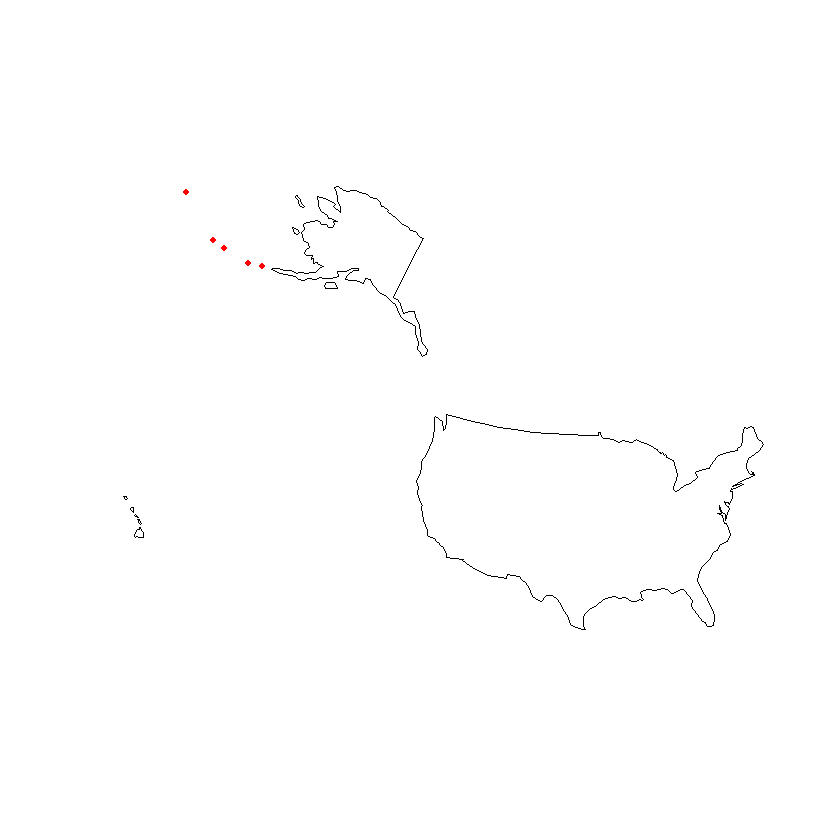

In [197]:
plot(st_geometry(usa))
plot(st_geometry(head(places[order(-places$dist_to_airport_mi),], 5)), col = "red", add = T, pch = 20)

The five populated places which are furthest from major airports are all located on the Alaskan Aleutian Islands which are very remote islands off the West coast of Alaska.

---

## Next Steps

* Return to the [**R Spatial Notebooks Project Chapter List**](https://vavramusser.github.io/r-spatial/#:~:text=R%20Spatial%20Notebooks%20Chapter%20List) to view a list of all available notebooks organized in the R Spatial Notebooks chapter structure.
* Visit the [**R Spatial Notebooks Project Homepage**](https://vavramusser.github.io/r-spatial) to learn more about the project, view the list of all notebooks, and explore additional resources.
* Join the project [**Mailing List**](https://mailchi.mp/ab01e8fc8397/r-spatial-email-signup) to hear about future notebook releases and other updates.
* If you have an idea for a new notebook please submit your idea via the [**Suggestion Box**](https://us19.list-manage.com/survey?u=746bf8d366d6fbc99c699e714&id=54590a28ea&attribution=false).

---

## ★ Thank You ★

Thank you so much for engaging with this notebook and supporting the project!  The R Spatial Notebooks Project is a labor of love so if you enjoy or benefit from these notebooks, please consider [**Donating to the Project**](https://buymeacoffee.com/vavramusser).  Your support allows me to continue producing notebooks and supporting the R Spatial Notebooks community.